In [ ]:
!pip install -r ./requirements/yolo_requirements.txt

In [38]:
from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
scratch_folder = os.path.join("..", "yaml")
yolo_config_path = os.path.join(scratch_folder, "yolo_config.yaml")
os.path.exists(scratch_folder)

In [41]:
model = YOLO("yolov8n.yaml")
#model = YOLO('yolov8n.pt') #Чтобы потестить визуализацию


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.Conv                  [128

Перед запуском, надо скачать подготовленный датасет и поменять в yaml путь к нему.
Путь к датасету должен быть чистым:
1. Без кириллицы
2. Без пробелов
3. Возможны еще какие-то варианты

In [ ]:
results = model.train(data=yolo_config_path, device=0, epochs=100) #Непонятно пока сколько эпох нужно

In [ ]:
results = model.val()

Сохранение модели в формате ONNX
Сурс: [https://docs.ultralytics.com/modes/export/](https://docs.ultralytics.com/modes/export/)

In [ ]:
exported_model = model.export(format='onnx') #Судя по всему здесь нельзя указать путь для сохранения. А жаль

Проверка модели

In [20]:
def load_image(img_path):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    return image

In [36]:
test_folder = "E:\\temp\\datasets\\test" #поставить свой путь к тестовым изображениям

all_images = os.listdir(test_folder)
example_images = [load_image(os.path.join(test_folder, img)) for img in all_images[:min(10, len(all_images))]]


0: 384x640 1 person, 3 cars, 1: 384x640 3 cars, 2 trucks, 2: 384x640 4 persons, 4 cars, 3: 384x640 1 person, 4 cars, 4: 384x640 2 persons, 3 cars, 5: 384x640 4 cars, 6: 384x640 2 cars, 1 bus, 7: 384x640 4 cars, 1 tv, 8: 384x640 1 car, 9: 384x640 11 cars, 472.0ms
Speed: 1.3ms preprocess, 47.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


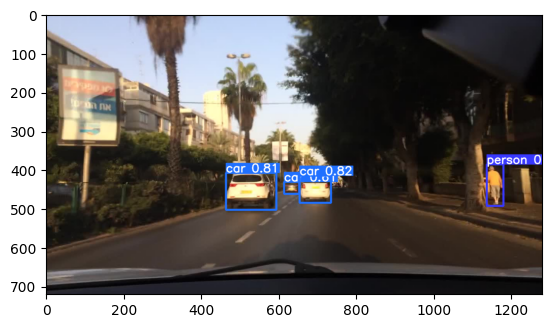

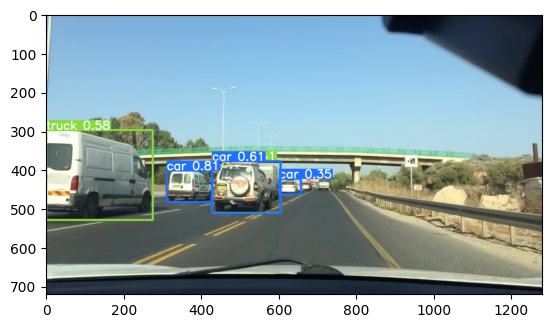

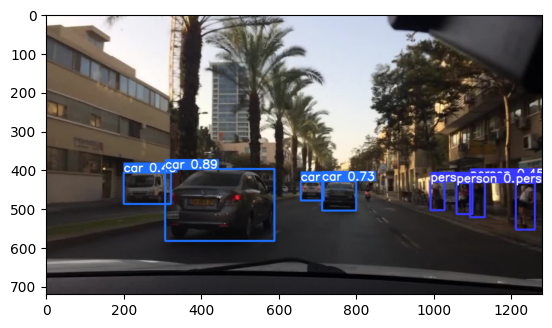

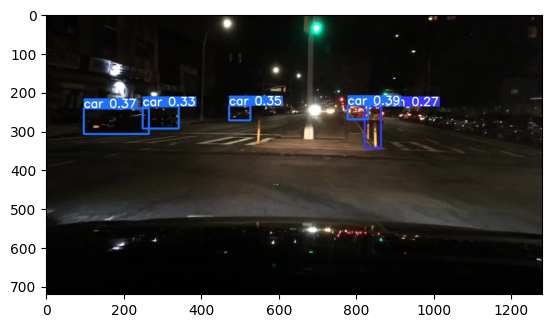

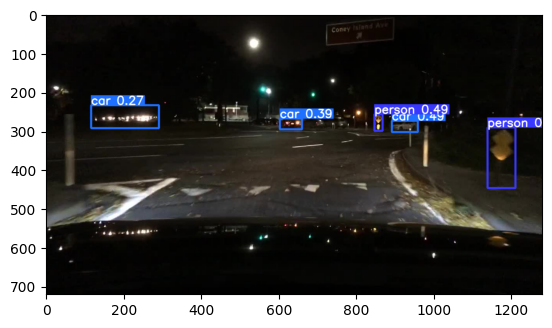

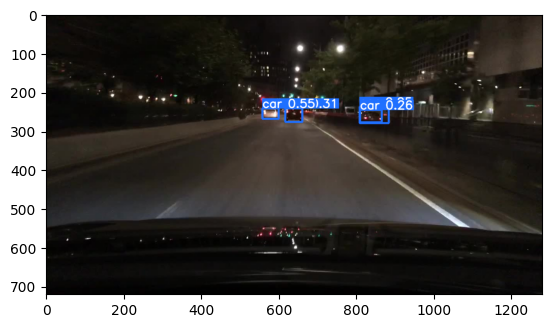

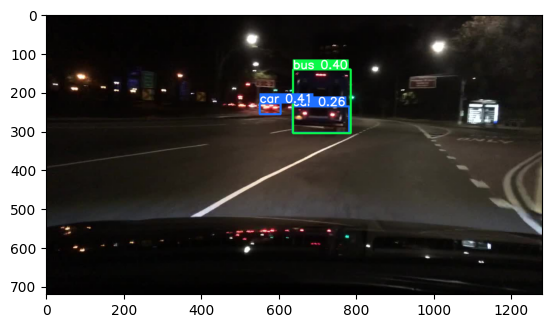

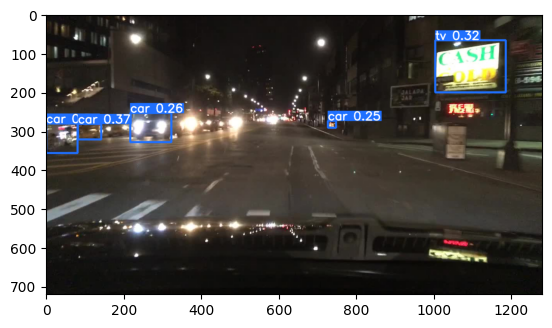

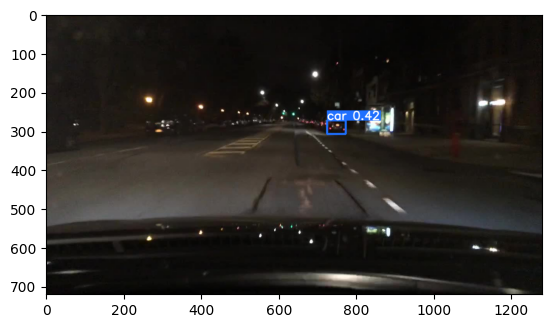

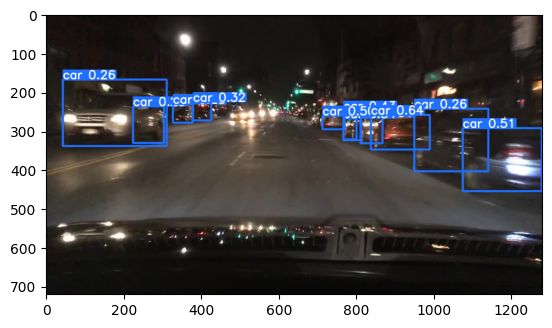

In [40]:
outputs = model(example_images)

for output in outputs:
    plt.imshow(output.plot())
    plt.show()